In [1]:
#Import all the necessary libraries first
import numpy as np                                       #For Numerical Operation
import pandas as pd                                      #For data manipulation and analysis
from sklearn.linear_model import LinearRegression          #Simple regression model
from sklearn.model_selection import train_test_split       #To split the dataset
from sklearn.metrics import root_mean_squared_error, r2_score    #For model Evaluation
import matplotlib.pyplot as plt                    #For data visualization
import seaborn as sns                      #For enhanced Visualization
import os


In [2]:
os.getcwd()

'/Users/nabinagahatraj/Desktop/BDA66'

In [3]:
#Load the dataset
df= pd.read_csv('AmesHousing.csv')


In [4]:
#Explore the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (2930, 82)


In [5]:
#Print the first few rows of the dat
df.head()   

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [59]:
pd.set_option('display.max_columns',None)         #Displaying all the columns of dataset without truncation
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,

In [16]:
df.info()          #quick overview of the data types and Null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [63]:
#Data Cleaning
#Checking the Missing Values
print("Missing Values:", df.isnull().sum())

Missing Values: Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


In [65]:
#Handling missing values in the dataset
# Dropping the rows with Missing target Values ( sale price of the houses)
df.dropna(subset=['SalePrice'], inplace=True)



In [102]:
#Defining a function and Replacing the Null Values in the Categorical columns with their Mode(Most Frequent Value)
def fill_null_with_mode(df):
    categorical_cols = df.select_dtypes(include='object').columns
    for col in categorical_cols:
        mode_value = df[col].mode()[0]            #Get the mode 
        df[col].fillna(mode_value, inplace=True)   #Replace Nulls with the Mode
    return df


In [110]:
#Replacing all the NUll values in the Numerical Columns with their Median
def fill_null_with_median(df):
    numerical_cols = df.select_dtypes(include= 'number').columns
    for col in numerical_cols:
        median_value= df[col].median()            #Get the Median
        df[col].fillna(median_value, inplace=True)         #Replace Nulls with the Median
    return df
    
    



In [112]:
#checking for Null Values again
df.isnull().sum()

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64

In [128]:
#finding out the data types of Relevant columns
print(df['Gr Liv Area'].dtype)
print(df['Year Built'].dtype)

int64
int64


In [130]:
print(df['Overall Cond'].dtype)
print(df['SalePrice'].dtype)
print(df['Full Bath'].dtype)
print(df['Half Bath'].dtype)
print(df['Garage Cars'].dtype)
print(df['Garage Area'].dtype)

int64
int64
int64
int64
float64
float64


In [132]:
#Feature Selection
#Selecting Features that are likely to affect house prices
#So here we will assume 'Gr Liv Area' (Ground Living Area),'Overall Cond' (the overall condition of the house), 'Year Built', 'Full Bath', 'Half Bath', 'Garage Cars', and 'Garage Area' are our features
X = df[['Gr Liv Area', 'Overall Cond', 'Year Built', 'Full Bath', 'Half Bath', 'Garage Cars', 'Garage Area']]     #features
y= df['SalePrice']                          #Target Variable (House Prices)

In [134]:
#Splitting the dataset into training and testing sets
#test_size=0.2 means 20% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [136]:
#Model Training
#Initialize the Linear Regression Model
model = LinearRegression()
#Fit the Model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [138]:
#Model Evaluation
#Make predictions on the test data
y_pred = model.predict(X_test)
y_pred

array([199485.41759831, 174902.34287897, 269641.87090706, 143839.88279227,
        85116.78348643, 198392.523171  , -20440.33673477, 124747.7066023 ,
       150218.95566229, 136945.46140152, 193056.84369178, 122557.38343632,
       270879.05675483, 117247.91717373, 216331.30446613, 151586.41530165,
       174230.00813195, 116598.94741247, 190046.07625966, 267228.55226021,
       198269.89410985, 317668.90305357, 242016.67138353, 245966.19481769,
       226412.48843044, 128445.16983276, 245300.32663511, 296551.58743765,
       237776.69486142, 337432.59175755, 199262.70056988, 250457.60414252,
       147228.54038277, 120961.15039916, 191306.45968783, 135406.33893158,
       189000.98825344, 174230.00813195, 272514.94658273, 140259.09553513,
       239870.5016545 , 164579.12937451, 303401.03582121, 139959.62234357,
       278754.57606025, 281373.61282508, 158272.5359127 , 201769.85221011,
       146019.7837752 , 220249.26320061, 117399.80053397, 113572.5068983 ,
       161483.74915115, 2

In [140]:
#Calculate Evaluation metrics
mse = root_mean_squared_error(y_test, y_pred)        #Mean Squared Error
r2 = r2_score(y_test, y_pred)                    #R-squared score
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 44507.56
R-squared Score: 0.70


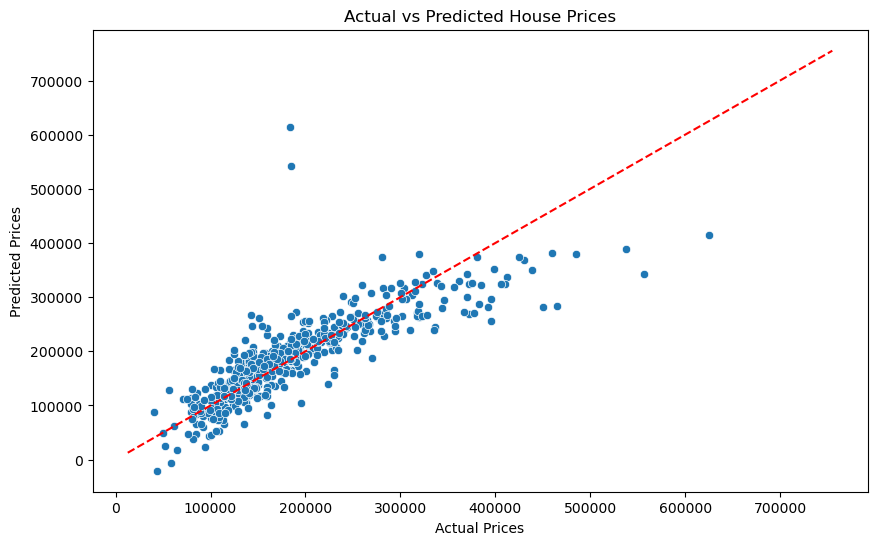

In [142]:
#Visualize the Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)        #Scatter plot of Actual vs Predicted Prices
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')       #Diagonal Line for the perfect predictions
plt.show()

#Insights

Here 0.70 r2 score means that the 70% of the variability in house prices is explained by this model. This is a moderately good fit.
The remaining 30% of the variability is due to other factors not captured by the model. The closer the r2 is to 1, the better the model explains the data. 
MSE is the average of the squared differences between the actual and predicted house prices.
Our model has the MSE of 44,507.56 dollars. It's essential to consider whether this value is small or large relative to the scale of the house prices. Since the house prices range between 100,000 and 1,000,000, the MSE of 44,507.56 is reasonably low.

''Scatter Plot''
The scatter plot shows the relationship between the actual house prices(on the x-axis) and the predicted house prices (on the y-axis). Ideally, the points should align along a 45-degree diagonal line, indicating the perfect predictions. Here, maximum points are aligned along a 45-degree diagonal line but only few points are scattered randomly, so the model is performing well. 
